# РОБОТА із ЗОБРАЖЕННЯМИ 
## Файл: Image_06_005
## Морфологічні перетворення. Дилатація  (Dilate)

### Використання бібліотеки  [skimage](https://scikit-image.org/)
### Модуль [skimage.morphology](https://scikit-image.org/docs/stable/api/skimage.morphology.html#module-skimage.morphology)


In [1]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.color as co
import skimage.morphology as mo
plt.rcParams['font.size'] = 10

In [2]:
# Визначення та друк параметрів зображення
def image_data (image):
    rank     = len(image.shape)
    rows_num = image.shape[0] ## кількість рядків
    clms_num = image.shape[1] ## кількість колонок
    chen_num = 1
    if rank == 3: 
        chen_num = image.shape[2] ## кількість каналів
    print('Опис зображення ')
    print('IMAGE RANK',  rank)
    print('IMAGE SHAPE', image.shape)
    print('DATA Type',   image.dtype)
    return rows_num,clms_num, chen_num

In [17]:
## Завантажуємо зображення 
filename = 'Virus_2_.jpg'
path = './IMAGES/'
Original_Im = io.imread(path+filename)

## Визначення стркутури та розміру зображення
rows_num, clms_num, chan = image_data (Original_Im)

## Перетворюємо до сірого
Original_Im_Gray = co.rgb2gray(Original_Im)

Опис зображення 
IMAGE RANK 3
IMAGE SHAPE (743, 700, 3)
DATA Type uint8


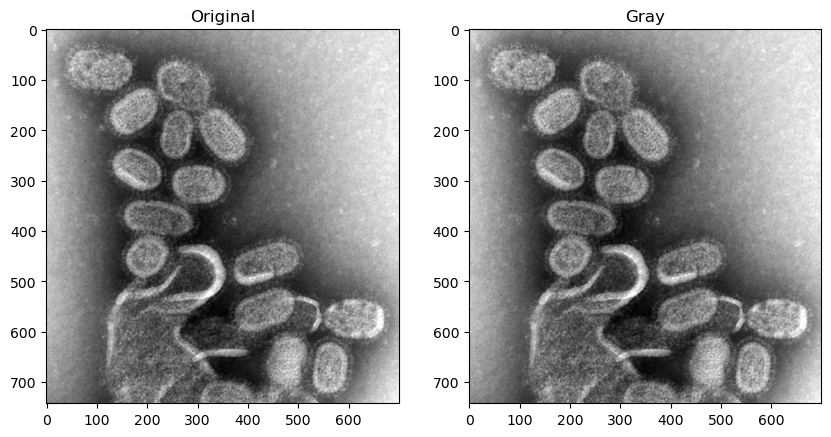

In [16]:
## Відображення
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(Original_Im)
ax[0].set_title("Original")
ax[1].imshow(Original_Im_Gray, cmap=plt.cm.gray)
ax[1].set_title("Gray")
plt.show()

#### Формування BW зображеннь
Використовується операція > піксельного порівняння. Для кожного пікселя в зображенні виконується перевірка: якщо значення яскравості пікселя більше, ніж граничне значення threshold, результатом буде логічне значення True (відповідає білому пікселю в бінарному зображенні). Якщо значення менше або дорівнює порога, то результатом буде False (відповідає чорному пікселю).

In [19]:
# Перший зріз
threshold_1 = 0.3
bw_image_1 = Original_Im_Gray > threshold_1
# Другий зріз
threshold_2 = 0.6
bw_image_2 = Original_Im_Gray > threshold_2

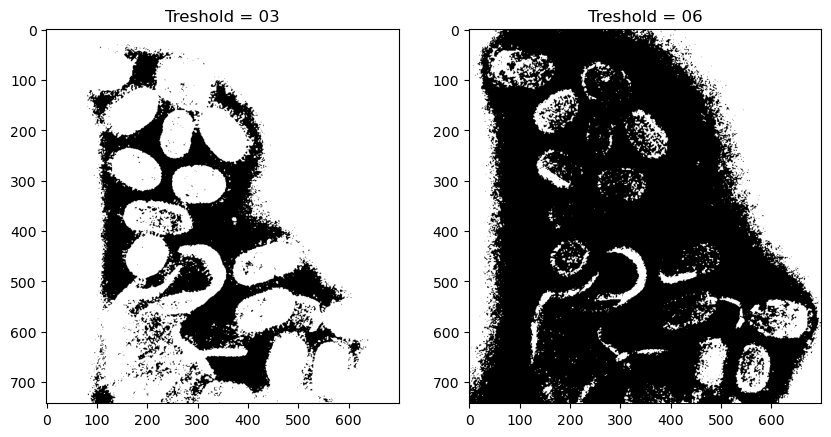

In [20]:
## Відображення
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(bw_image_1, cmap=plt.cm.gray)
ax[0].set_title("Treshold = 03")
ax[1].imshow(bw_image_2, cmap=plt.cm.gray)
ax[1].set_title("Treshold = 06")
plt.show()


#### Формування структурного елементу

Skimage підтримує 
- Диск (Disk) - круглий структурний елемент.
- Квадрат (square) – структурний елемент у формі квадрата.
- Прямокутник (rectangle) – прямокутний структурний елемент.
- Хрест (diamond) – структурний елемент у формі ромба (діамант).
- Овал (ellipse) – структурний елемент у формі еліпса.
- Октагон (octagon) – структурний елемент у формі октагону.
- Зірка (star) – структурний елемент у формі зірки.
- Структурний елемент загального виду (footprint) – довільна бінарна матриця, яка визначається вручну.

In [38]:
# Створюємо структурний елемент (у цьому випадку, диск радіусом 2)
footprint = mo.disk(2)

print('Структурний елемент \n', footprint)

Структурний елемент 
 [[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


#### Дилатація (dilation)

skimage.morphology.**binary_dilation**(*image*, *footprint=None*, *out=None*, ***, *mode='ignore'*)lse, True].



Функція поверає  бінарне морфологічне розширення зображення. Розширення збільшує білі (яскраві) області та зменшує чорні (темні)  області.
Параметри:

- **image** - numpy array -  бінарне вхідне зображення.

- **footprint** - numpy array або кортеж, структурний елемент , виражені двовимірним масивом 1 і 0. 

- **out** - numpy array, необов’язковий масив для зберігання результату морфології. 

- **mode** - string, необов'язковий параметр режиму визначає спосіб обробки меж масиву.

Функція повертає розширений ndarray для bool або uint як результат морфологічного розширення зі значеннями False або True.

In [39]:
# Виконуємо дилатацію з першим зображенням
dilated_1 = mo.binary_dilation(bw_image_1, footprint)
# Виконуємо дилатацію з другим зображенням
dilated_2 = mo.binary_dilation(bw_image_2, footprint)           

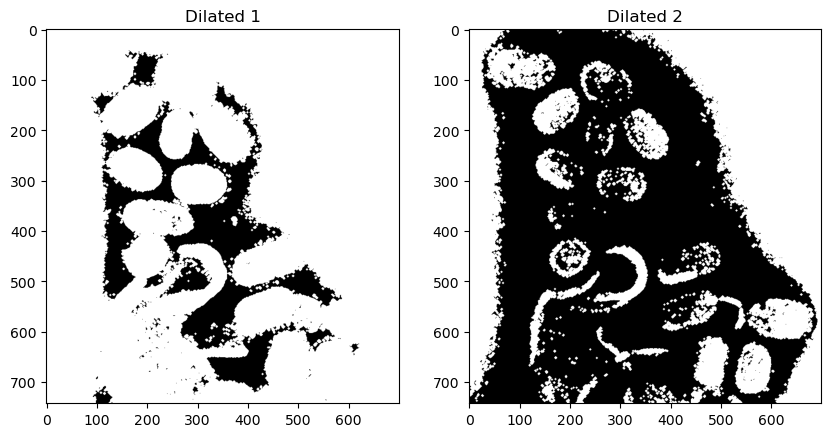

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(dilated_1, cmap=plt.cm.gray)
ax[0].set_title("Dilated 1")
ax[1].imshow(dilated_2, cmap=plt.cm.gray)
ax[1].set_title("Dilated 2")
plt.show()                  

### Порявняння для зрізу_1 = 0.3

In [36]:
# Кількість білих в зображеннях (True или 1)
white_pixel_bw_1 = np.sum(bw_image_1)
white_pixel_dl_1 = np.sum(dilated_1)
print ('Білих пікселів ')
print ('До операції ', white_pixel_bw_1, 'Після операції ', white_pixel_dl_1,'Різниця', white_pixel_dl_1 - white_pixel_bw_1)

Білих пікселів 
До операції  412498 Після операції  445020 Різниця 32522


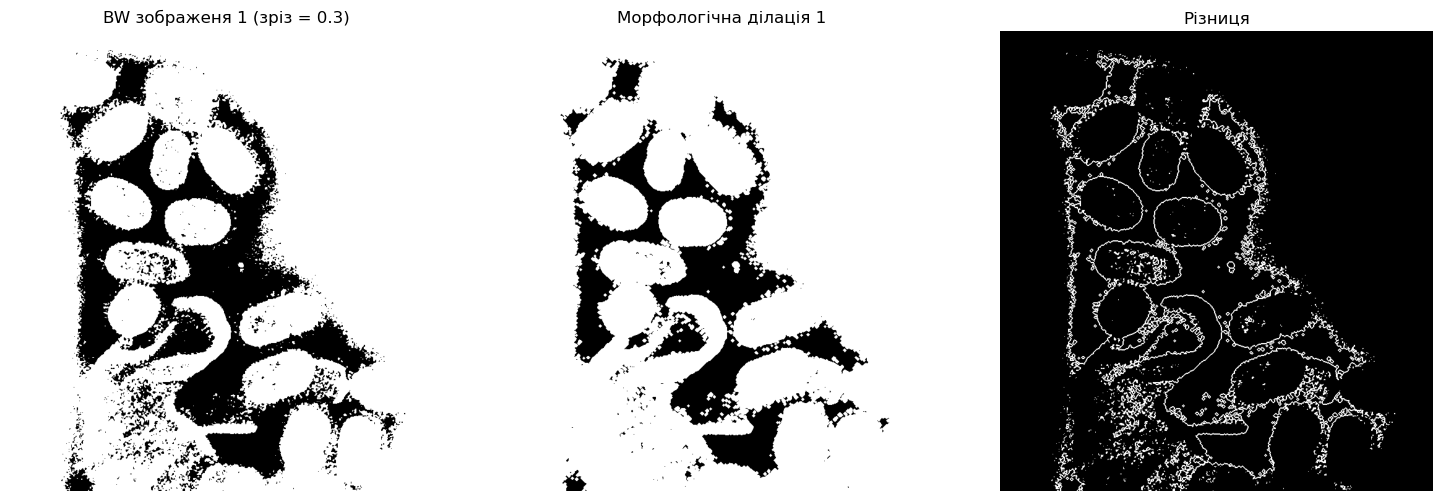

In [24]:
# Візуальне порівняння
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(bw_image_1, cmap='gray')
ax[0].set_title("BW зображеня 1 (зріз = 0.3)")

ax[1].imshow(dilated_1, cmap='gray')
ax[1].set_title("Морфологічна ділація 1")

# Разница между изображениями
difference_1 = np.logical_xor(bw_image_1,dilated_1)
ax[2].imshow(difference_1, cmap='gray')
ax[2].set_title("Різниця")

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

### Порявняння для зрізу_2 = 0.6

In [35]:
# Кількість білих в зображеннях (True или 1)
white_pixel_bw_2 = np.sum(bw_image_2)
white_pixel_dl_2 = np.sum(dilated_2)
print ('Білих пікселів ')
print ('До операції ', white_pixel_bw_2, 'Після операції ', white_pixel_dl_2, 'Різниця', white_pixel_dl_2 - white_pixel_bw_2)

Білих пікселів 
До операції  172659 Після операції  220466 Різниця 47807


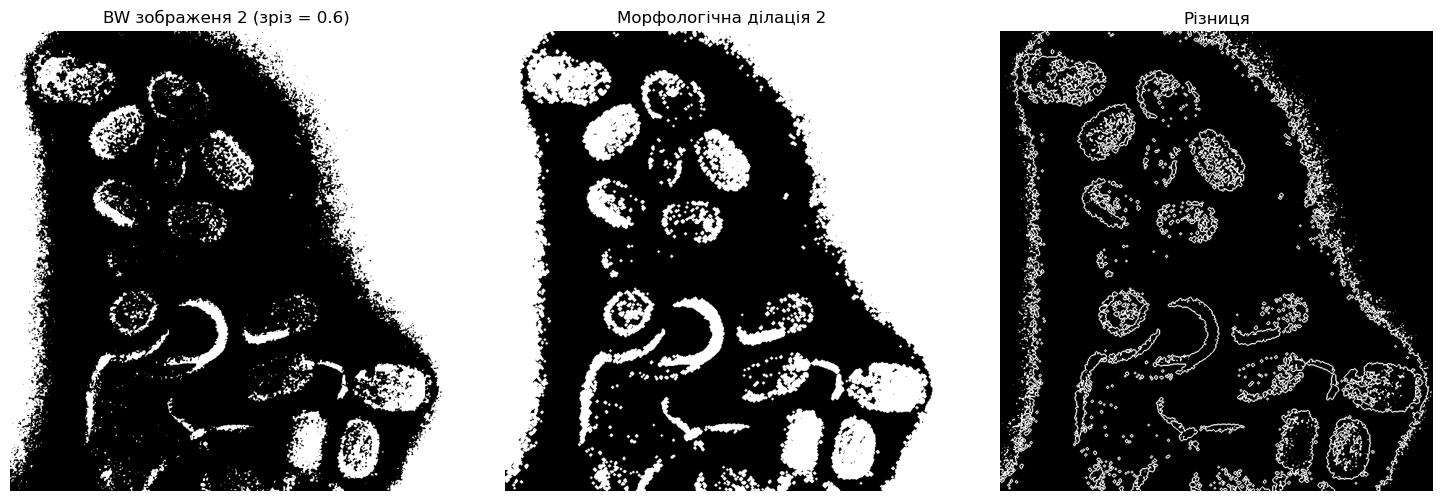

In [25]:
# Візуальне порівняння
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(bw_image_2, cmap='gray')
ax[0].set_title("BW зображеня 2 (зріз = 0.6)")

ax[1].imshow(dilated_2, cmap='gray')
ax[1].set_title("Морфологічна ділація 2")

# Разница между изображениями
difference_1 = np.logical_xor(bw_image_2,dilated_2)
ax[2].imshow(difference_1, cmap='gray')
ax[2].set_title("Різниця")

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()